<a href="https://colab.research.google.com/github/skml29/Trabajo-de-investigaci-n/blob/skml29-codes/Cylinder1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy.special as sc
from scipy.integrate import odeint

In [ ]:
pi = np.pi

In [ ]:
class eqnn:
    def __init__(self, m):
        self.m = m

    def __call__(self, w):
        return  self.m*sc.iv(self.m,w) + w*sc.iv(self.m+1,w)

In [ ]:
class oden:
    def __init__(self, m):
        self.m = m

    def __call__(self, z,t):
        return  2*z/(self.m**2-t**2 + z)

In [ ]:
mmax = 5
bmax = 10
t0 = 1/1000
n_pack = []
for m in range(mmax):
    bb = np.linspace(m + t0, bmax, 2500)
    st = 2*(m+1)*t0
    f = oden(m)
    egv = odeint(f , st, bb)
    n_pack.append((bb, egv))  

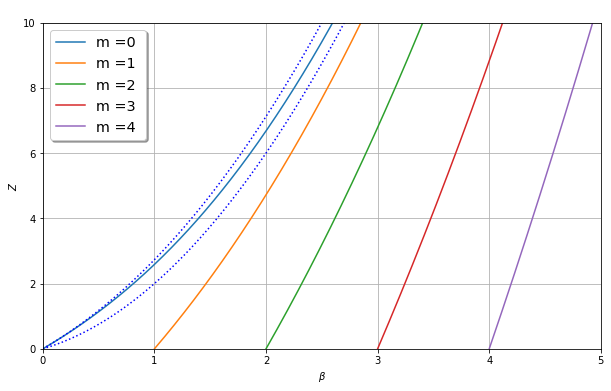

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
mmax = len(n_pack)
m = 0
for (xx, yy) in n_pack:
    ax.plot(xx, yy,  label=f"m ={m} ")
    m = m+1

x = np.linspace(0, 10, 1000)
y1=x**2+x
plt.plot(x, y1, color = 'b', linestyle='dotted')

x = np.linspace(0, 10, 1000)
y11=(x**2+ x + x*(((1+x)**2 + 8)**(1/2)))/2
plt.plot(x, y11, color = 'b', linestyle='dotted')

#y2=(x-1)**2 +(x-1)
#plt.plot(x, y2, color = 'orange', linestyle='dotted')

#y3=(x-2)**3+(x-2)**2 +(x-2)
#plt.plot(x, y3, color = 'green', linestyle='dotted')
#ax.legend(loc='lower left', shadow=True, fontsize='x-large')
ax.set(xlabel=r'$\beta$', ylabel=r'$Z$', \
       title=' ')
    
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlim(0, 5)
plt.ylim(0, 10)
plt.grid()
plt.show()

In [ ]:
beta_max = pi

In [ ]:
def pos1_scaled(b):
    step, nmax = pi, 4
    b0, ps = 3*pi/4, []
    for n in range(nmax):
        val = fsolve(lambda w: w*np.sin(w)+ b*np.cos(w), [b0])[0] 
        ps.append((val)**2) 
        b0 = val + step
    return (np.array(ps))

In [ ]:
def pos2_scaled(b):
    step, nmax = pi, 4
    b0, ps = pi/2-b, []
    if b>1: b0 = pi +pi/6
    for n in range(nmax):
        val = fsolve(lambda w: w*np.cos(w)- b*np.sin(w), [b0])[0] 
        ps.append((val)**2) 
        b0 = val + step
    return (np.array(ps))

In [ ]:
bb = np.arange(1/100, 1.0, 0.05)
bc = np.arange(1/100, 3.0, 0.05)
p2 = [pos2_scaled(b)[0] for b in bb]
p1 = [pos1_scaled(b)[0] for b in bc]



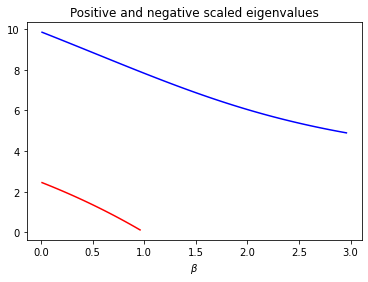

In [ ]:
fig, ax = plt.subplots()
ax.plot(bc, p1,color = 'b', label=r'$p_1(\beta)$') 
ax.plot(bb, p2,color = 'r', label=r'$p_2(\beta)$')
#ax.plot(bb, sc1(bb),  linewidth=3, color = 'k',label =r'$sc_1(\beta)$')  

ax.set(xlabel=r'$\beta$', ylabel=r'', \
       title='Positive and negative scaled eigenvalues')
#ax.legend(loc='center left', shadow=True)
plt.show()

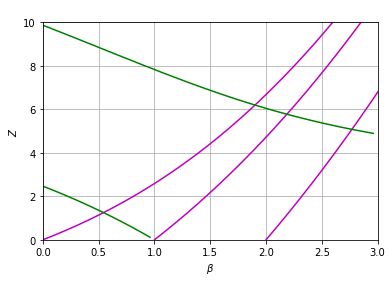

In [ ]:
fig, ax = plt.subplots()
mmax = len(n_pack)
m = 0
for (xx, yy) in n_pack:
    ax.plot(xx, yy, color = 'm',  label=f"m ={m} ")
    m = m+1
#ax.legend(loc='lower left', shadow=True, fontsize='x-large')
ax.set(xlabel=r'$\beta$', ylabel=r'$Z$', \
       title=' ')
  
#ax.legend(loc='upper left', shadow=True, fontsize='x-large')
ax.plot(bc, p1,color = 'g', label=r'$p_1(\beta)$') 
ax.plot(bb, p2,color = 'g', label=r'$p_2(\beta)$')
plt.xlim(0, 3)
plt.ylim(0, 10)
plt.grid()
plt.show()